pandas — это быстрый, мощный, гибкий и простой в использовании инструмент для анализа и обработки данных с открытым исходным кодом.</br>
numpy — фундаментальный пакет для научных вычислений с Python.</br>
Seaborn — это библиотека визуализации данных Python, основанная на matplotlib. Она предоставляет высокоуровневый интерфейс для рисования привлекательных и информативных статистических графиков.

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

<br>
Настройка отображения pandas

In [2]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
pd.set_option('display.width', 200)

<br>
Создание dataframe из excel файла

In [3]:
df = pd.read_excel('D:/work2022_2023/excel/Обьединенные_данные_за_все_время/Все_данные\proff_20%_with_errors\расчет_соц_успеш/classes_proff_20%_with_errors.xlsx')

<br>
Выбираем нужные для работы столбцы. Выводим размерность датафрейма

In [4]:
cols = ['friends_2', 'followers_2', 'photos_2', 'videos_2', 'audios_2', 'pages_2', 'post_count_2', 'post_likes_2',
        'all_repost_count_2', 'all_repost_likes_2', 'repost_count_2', 'repost_likes_2', 'repost_comm_count_2', 'repost_comm_likes_2',
        'views_2', 'reverse_repost_2', 'photos_count_2', 'photos_likes_2', 'videos_count_2', 'videos_likes_2',
        'page_degree_2', 'online_2', 'online_count_2', 
        'Элементы', 'Ребра', 'Друзья', 'Плотность', 'Коэффициент кластеризации', 'Центральность по степени', 'Центральность по близости',
        'Классы_СУ_Домин', 'Классы_СУ_Дружел']

df = df[cols].copy()

print(df.shape)

(1980, 32)


<br>
Удаляем строки, в которых содержатся пустые значения (2 строки)

In [5]:
df.drop(index=df.loc[df['online_2'].isnull()].index, axis=0, inplace=True)


<br>
Выделяем столбцы, которые использоваилсь при создании формулы доминирования, дружелюбия.

In [6]:
used_feats_domin = ['followers_2', 'friends_2',
                    'post_likes_2', 'post_count_2',
                    'photos_count_2', 'photos_likes_2',
                    'videos_count_2', 'videos_likes_2',
                    'reverse_repost_2', 'views_2']

used_feats_drugel = ['online_2', 'online_count_2', 'friends_2', 'repost_count_2',
                    'post_count_2', 'page_degree_2']


<br>
Удаляем строки, содержащие номер классов доминирования, дружелюбия равный 3

In [7]:
target_domin = df[['Классы_СУ_Домин']].copy()
target_drugel = df[['Классы_СУ_Дружел']].copy()

df.drop(columns=['Классы_СУ_Домин', 'Классы_СУ_Дружел'], axis=1, inplace=True)

df_domin = df.copy()
df_drugel = df.copy()

domin_3_class_index = target_domin.loc[target_domin['Классы_СУ_Домин'] == 3].index
target_domin.drop(index=domin_3_class_index, axis=0, inplace=True)
df_domin.drop(index=domin_3_class_index, axis=0, inplace=True)

drugel_3_class_index = target_drugel.loc[target_drugel['Классы_СУ_Дружел'] == 3].index
target_drugel.drop(index=drugel_3_class_index, axis=0, inplace=True)
df_drugel.drop(index=drugel_3_class_index, axis=0, inplace=True)

<br>
Изменяем номера классов. Если номер класса равен 1 или 2, изменяем его на 0. Если номер класса равен 4 или 5, изменяем его на 1

In [8]:
target_domin.loc[target_domin['Классы_СУ_Домин'] <= 2, 'Классы_СУ_Домин'] = 0
target_domin.loc[target_domin['Классы_СУ_Домин'] >= 3, 'Классы_СУ_Домин'] = 1

target_drugel.loc[target_drugel['Классы_СУ_Дружел'] <= 2, 'Классы_СУ_Дружел'] = 0
target_drugel.loc[target_drugel['Классы_СУ_Дружел'] >= 3, 'Классы_СУ_Дружел'] = 1

<br>
Удаляем столбцы, которые использовались в формуле доминирования/дружелюбия

In [9]:
df_domin.drop(columns=used_feats_domin, axis=1, inplace=True)
df_drugel.drop(columns=used_feats_drugel, axis=1, inplace=True)

print('df domin shape:', df_domin.shape)
print('df drugel shape:', df_drugel.shape)

df domin shape: (1582, 20)
df drugel shape: (1582, 24)


In [10]:
print(df_domin.columns.to_list())
print('----------------------')
print(used_feats_domin)

['photos_2', 'videos_2', 'audios_2', 'pages_2', 'all_repost_count_2', 'all_repost_likes_2', 'repost_count_2', 'repost_likes_2', 'repost_comm_count_2', 'repost_comm_likes_2', 'page_degree_2', 'online_2', 'online_count_2', 'Элементы', 'Ребра', 'Друзья', 'Плотность', 'Коэффициент кластеризации', 'Центральность по степени', 'Центральность по близости']
----------------------
['followers_2', 'friends_2', 'post_likes_2', 'post_count_2', 'photos_count_2', 'photos_likes_2', 'videos_count_2', 'videos_likes_2', 'reverse_repost_2', 'views_2']


<br>
Строим корреляционную матрицу по столбцам датафрейма по доминированию

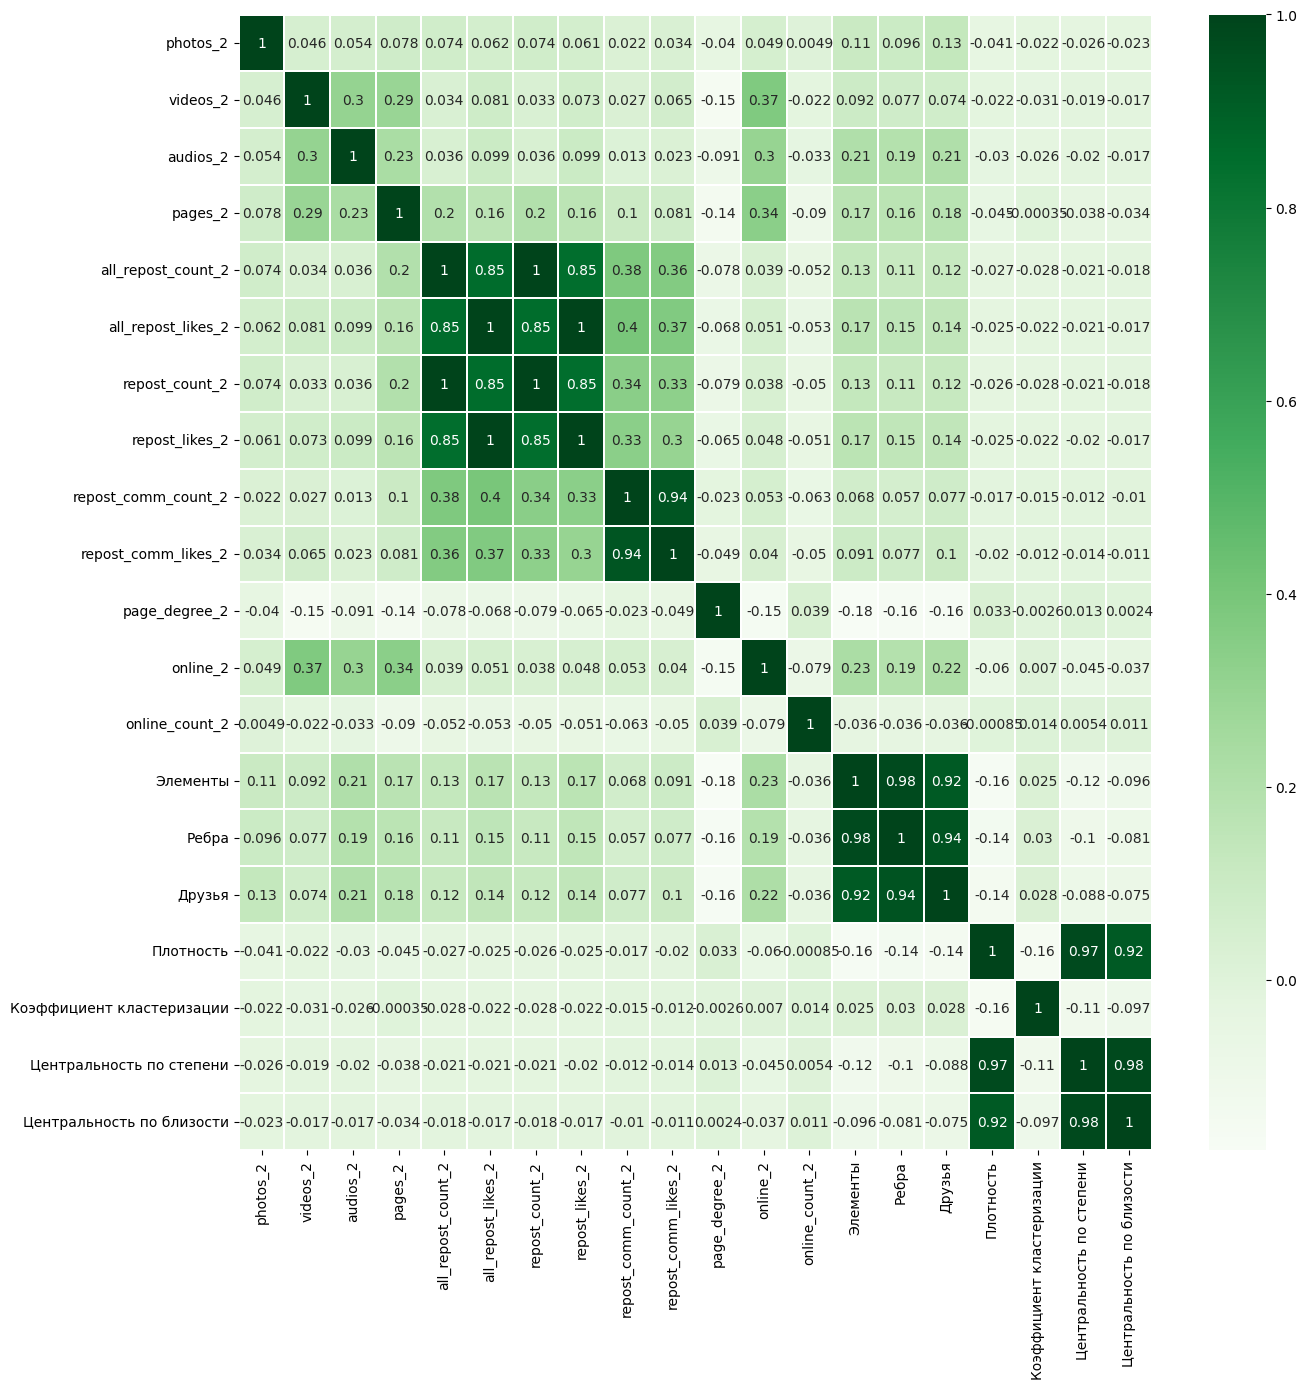

In [11]:
plt.figure(figsize=(14,14))
sns.heatmap(data=df_domin.corr(), cmap='Greens', annot=True, linewidths=0.1)
plt.tight_layout()

<br>
Удаляем сильно коррелирующие столбцы

In [12]:
df_domin.drop(columns=['videos_2', 'all_repost_likes_2', 'repost_count_2', 'repost_likes_2', 'repost_comm_likes_2', 'Элементы', 'Друзья', 'Ребра', 'Плотность', 'Центральность по близости'], axis=1, inplace=True)

<br>
Строим корреляционную матрицу по столбцам датафрейма по дружелюбию

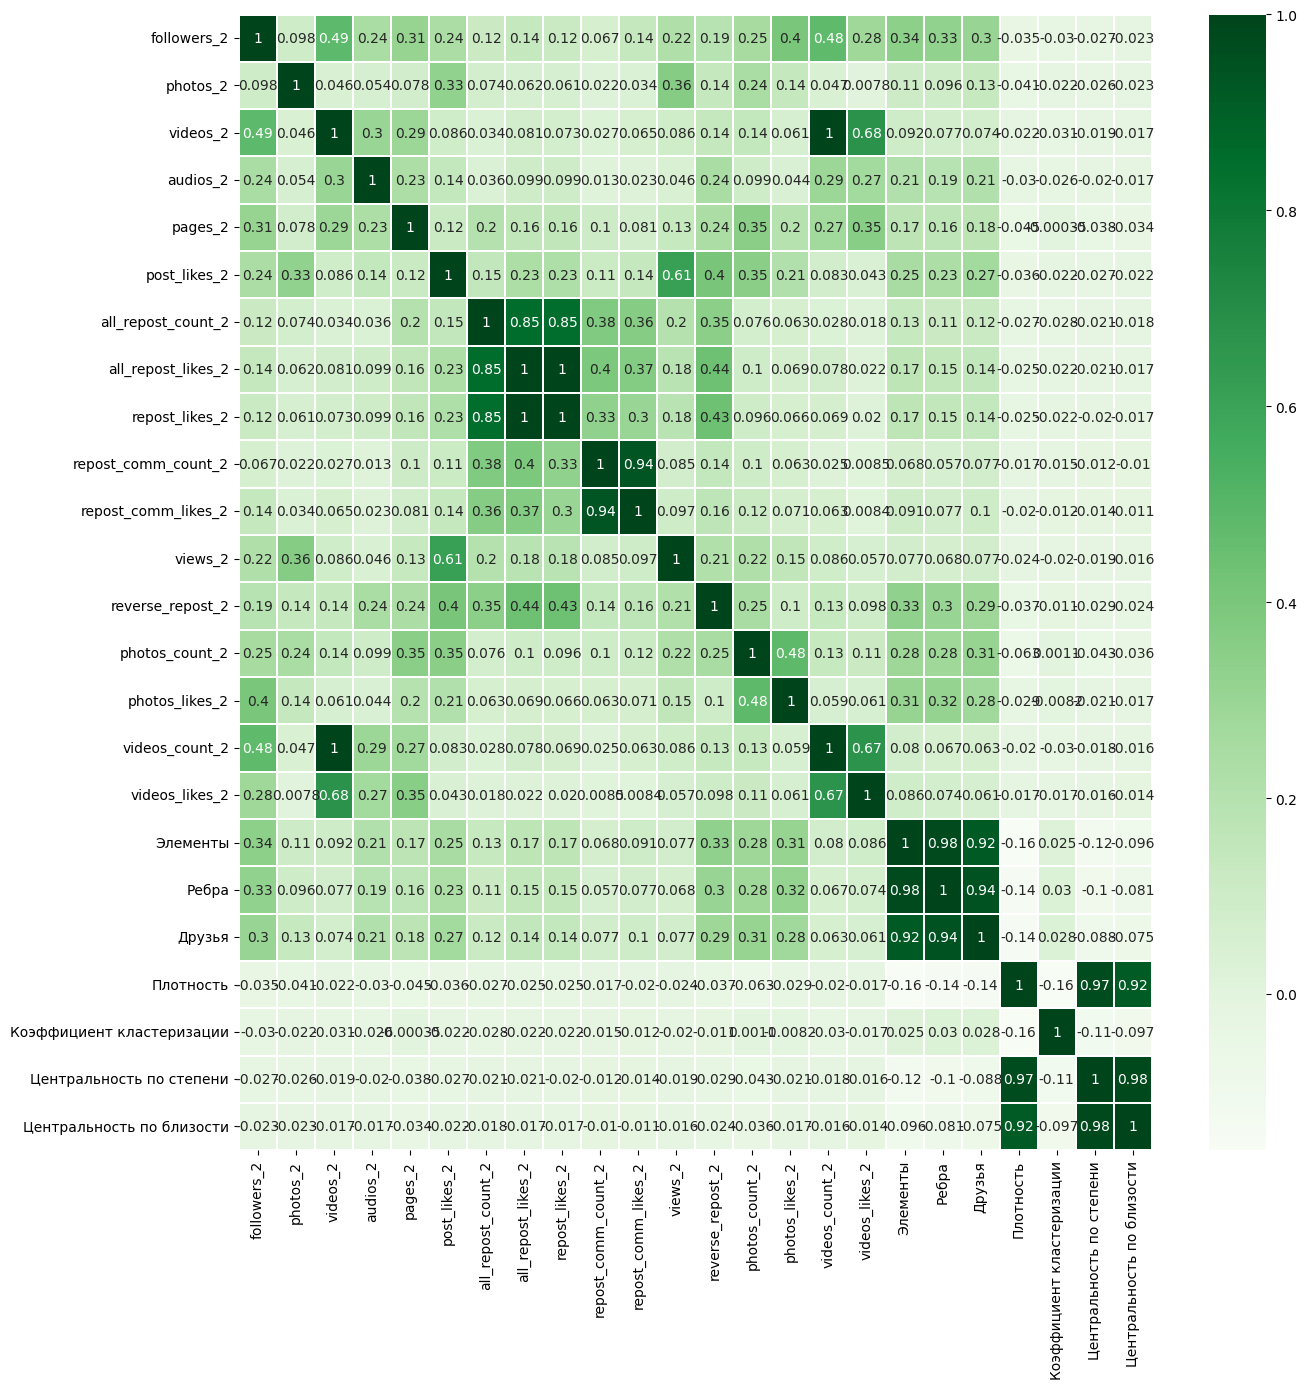

In [13]:
plt.figure(figsize=(14,14))
sns.heatmap(data=df_drugel.corr(), cmap='Greens', annot=True, linewidths=0.1)
plt.tight_layout()

<br>
Удаляем сильно коррелирующие столбцы

In [14]:
df_drugel.drop(columns=['all_repost_count_2', 'all_repost_likes_2', 'repost_likes_2', 'repost_comm_likes_2', 'videos_count_2', 'videos_likes_2', 'Элементы', 'Друзья', 'Ребра', 'Плотность', 'Центральность по близости'], axis=1, inplace=True)


<br>
Импортируем библиотеки, используемые для классификации доминирования/дружелюбия.<br>
sklearn — это библиотека, предназначенная для машинного обучения, в её состав входят различные алгоритмы, в том числе предназначенные для задач классификации, регрессионного и кластерного анализа данных и др.<br>
torch — фреймворк машинного обучения для языка Python.

In [15]:
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, KFold
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

import torch

from torch import nn
from torch.utils.data import DataLoader, Dataset

In [16]:
print(df_domin.columns.to_list())
print(used_feats_domin)

['photos_2', 'audios_2', 'pages_2', 'all_repost_count_2', 'repost_comm_count_2', 'page_degree_2', 'online_2', 'online_count_2', 'Коэффициент кластеризации', 'Центральность по степени']
['followers_2', 'friends_2', 'post_likes_2', 'post_count_2', 'photos_count_2', 'photos_likes_2', 'videos_count_2', 'videos_likes_2', 'reverse_repost_2', 'views_2']


<br>
Стандартизация наборов данных доминирования/дружелюбия.<br>
Разделение набора данных на тестовую и обучающую выборки отдельно для доминирования/дружелюбия

In [17]:
st_scaler = StandardScaler()
X_drugel_scalered = pd.DataFrame(st_scaler.fit_transform(df_drugel), columns=df_drugel.columns, index=df_drugel.index)

X_drugel_train, X_drugel_test, y_drugel_train, y_drugel_test = train_test_split(X_drugel_scalered, target_drugel, test_size=0.3)

In [18]:
st_scaler = StandardScaler()
X_domin_scalered = pd.DataFrame(st_scaler.fit_transform(df_domin), columns=df_domin.columns, index=df_domin.index)

X_domin_train, X_domin_test, y_domin_train, y_domin_test = train_test_split(X_domin_scalered, target_domin, test_size=0.3)

<br>
Определение класса MLP.<br>
Определение функций train и test.<br>

In [19]:
class MLP(nn.Module):
    def __init__(self, num_feats):
        super().__init__()

        self.lin1 = nn.Linear(in_features=num_feats, out_features=20)
        self.act1 = nn.ReLU()
        self.lin2 = nn.Linear(in_features=20, out_features=10)
        self.act2 = nn.ReLU()
        self.drop = nn.Dropout()
        self.lin3 = nn.Linear(in_features=10, out_features=1)
        self.act3 = nn.Sigmoid()

    def forward(self, x):
        x = self.lin1(x)
        x = self.act1(x)
        x = self.lin2(x)
        x = self.act2(x)
        x = self.drop(x)
        x = self.lin3(x)
        x = self.act3(x)
        return x


class MyDataset(Dataset):
    def __init__(self, x, y):
        self.features = torch.tensor(x.to_numpy(), dtype=torch.float32)
        self.labels = torch.tensor(y.to_numpy(), dtype=torch.float32)

    def __len__(self):
        return self.features.shape[0]

    def __getitem__(self, idx):
        x = self.features[idx]
        y = self.labels[idx]
        return x, y


def train(dataloader, model, loss_bce, optimizer):
    correct, all_loss = 0, 0
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        pred = model(X)
        correct += (torch.round(pred) == y).type(torch.float).sum().item()

        loss = loss_bce(pred, y)
        all_loss += loss.item()


        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    return all_loss / size, correct / size


def test(dataloader, model, loss_bce):
    model.eval()
    size = len(dataloader.dataset)

    correct, all_loss = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            all_loss += loss_bce(pred, y).item()
            correct += (torch.round(pred) == y).type(torch.float).sum().item()
    return all_loss / size, correct / size

In [20]:
def compute_cm(ml_model, dataloader):
    ml_model.eval()
    y_true = []
    y_pred = []

    for batch, (X, y) in enumerate(dataloader):
        
        y_pred.extend(torch.round(ml_model(X)).detach().numpy())
        y_true.extend(y.tolist())

    cm = confusion_matrix(y_true, y_pred)
    cm_df = pd.DataFrame(cm, columns=['Predicted Negative', 'Predicted Positive'],
                             index=['Actual Negative', 'Actual Positive'])
    print('Confusion Matrix : \n', cm_df)
    TP = cm[1][1]
    TN = cm[0][0]
    FP = cm[0][1]
    FN = cm[1][0]
    conf_accuracy = (float(TP + TN) / float(TP + TN + FP + FN))
    conf_misclassification = 1 - conf_accuracy
    conf_sensitivity = (TP / float(TP + FN))
    conf_specificity = (TN / float(TN + FP))
    conf_precision = (TN / float(TN + FP))
    conf_f1 = 2 * ((conf_precision * conf_sensitivity) / (conf_precision + conf_sensitivity))

    print(f'Accuracy: {round(conf_accuracy, 2)}')
    print(f'Mis-Classification: {round(conf_misclassification, 2)}')
    print(f'Sensitivity: {round(conf_sensitivity, 2)}')
    print(f'Specificity: {round(conf_specificity, 2)}')
    print(f'Precision: {round(conf_precision, 2)}')
    print(f'f_1 Score: {round(conf_f1, 2)}')

<br>
Инициализация классификатора RandomForest.<br>
Подбор (настройка параметров) наилучших параметров (перебором) для RandomForest при помощи GridSearchCV.<br>
Настраиваются такие параметры, как n_estimators, max_depth.<br>
n_estimators - количество деревьев в лесу.<br>
max_depth - максимальная глубина дерева.

In [21]:
def sklearn_ml(X_drugel, y_drugel, X_train, y_train, X_test, y_test):
    classifiers = {
        'RandomForest': RandomForestClassifier(random_state=0)
    }
    RF_grid = {'n_estimators': [50, 100, 150, 200, 250, 300],
               'max_depth': [4, 6, 8, 10, 12]}
    grid = {
        'RandomForest': RF_grid
    }

    clf_best_params = classifiers.copy()

    valid_scores = pd.DataFrame({'Classifier': classifiers.keys(),
                                 'Valid accuracy': np.zeros(len(classifiers))})
    i = 0
    for key, classifier in classifiers.items():
        clf = GridSearchCV(estimator=classifier, param_grid=grid[key], scoring='accuracy',
                           n_jobs=-1, cv=2)

        clf.fit(X_train, y_train.values.ravel())

        valid_scores.iloc[i, 1] = clf.score(X_test, y_test.values.ravel())
        clf_best_params[key] = clf.best_params_

    print(valid_scores)

    best_classifiers = {
        'RandomForest': RandomForestClassifier(**clf_best_params['RandomForest'], random_state=0)
    }

    FOLDS = 7

    for key, classifier in best_classifiers.items():
        cv = StratifiedKFold(n_splits=FOLDS, shuffle=True, random_state=0)

        score = 0
        for fold, (train_idx, val_idx) in enumerate(cv.split(X_drugel, y_drugel.values.ravel())):
            X_train, X_valid = X_drugel.iloc[train_idx], X_drugel.iloc[val_idx]
            y_train, y_valid = y_drugel.iloc[train_idx], y_drugel.iloc[val_idx]

            clf = classifier
            clf.fit(X_train, y_train.values.ravel())

            score += clf.score(X_valid, y_valid)

        print(score / FOLDS)
    

<br>
Определение функции, отвечающей за обучение модели MLP.<br>
В качестве функции потерь использвуется BCELoss.<br>
В качестве оптимизатора используется Adam, со скоростью обучения 5e-4.<br>
В качестве основной метрики оценки работы модели MLP используется accuracy (точность).<br>
В данном случае можно использовать accuracy, так как набор данных сбалансирован (одиноваковое количество данных с метками классов 0 и 1).

In [22]:
def nn_model(X_train, X_test, y_train, y_test, current_df):
    train_ds = MyDataset(X_train, y_train)
    test_ds = MyDataset(X_test, y_test)

    train_loader = DataLoader(dataset=train_ds, batch_size=64, shuffle=True)
    test_loader = DataLoader(dataset=test_ds, batch_size=64, shuffle=True)

    model = MLP(num_feats=current_df.shape[1])

    loss = nn.BCELoss()
    lr = 5e-4
    epochs = 300
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)

    losses = {'train': [], 'test': []}
    accs = {'train': [], 'test': []}

    for i in range(1, epochs):
        print(f'Epoch: {i}')
        train_avg_loss, train_acc = train(train_loader, model, loss, optimizer)
        test_avg_loss, test_acc = test(test_loader, model, loss)
        print(f'Train avg loss: {train_avg_loss}, train acc: {train_acc}')
        print(f'Test avg loss: {test_avg_loss}, test acc: {test_acc}')
        losses['train'].append(train_avg_loss)
        losses['test'].append(test_avg_loss)
        accs['train'].append(train_acc)
        accs['test'].append(test_acc)

    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes[0].plot(accs['train'], label='train')
    axes[0].plot(accs['test'], label='test')
    axes[0].legend()
    axes[0].set_title('Accuracy')
    axes[1].plot(losses['train'], label='train')
    axes[1].plot(losses['test'], label='test')
    axes[1].legend()
    axes[1].set_title('Losses')
    plt.tight_layout()

    plt.show()
    
    compute_cm(model, test_loader)

In [23]:
sklearn_ml(df_drugel, target_drugel, X_drugel_train, y_drugel_train, X_drugel_test, y_drugel_test)

     Classifier  Valid accuracy
0  RandomForest        0.938947
0.9323640960809102


Epoch: 1
Train avg loss: 0.011239057956995356, train acc: 0.5185185185185185
Test avg loss: 0.011632759822042364, test acc: 0.5410526315789473
Epoch: 2
Train avg loss: 0.01116479180800344, train acc: 0.5456187895212286
Test avg loss: 0.011524301202673662, test acc: 0.5705263157894737
Epoch: 3
Train avg loss: 0.011059832982146859, train acc: 0.5718157181571816
Test avg loss: 0.01142540228994269, test acc: 0.5789473684210527
Epoch: 4
Train avg loss: 0.010971533196836091, train acc: 0.5916892502258356
Test avg loss: 0.011349757847033048, test acc: 0.6378947368421053
Epoch: 5
Train avg loss: 0.010863435946828951, train acc: 0.6368563685636857
Test avg loss: 0.01123896034140336, test acc: 0.6547368421052632
Epoch: 6
Train avg loss: 0.01075915544013667, train acc: 0.6675700090334237
Test avg loss: 0.01113224004444323, test acc: 0.6926315789473684
Epoch: 7
Train avg loss: 0.01059899259065871, train acc: 0.6874435411020777
Test avg loss: 0.01099746114329288, test acc: 0.7136842105263158
Epoch:

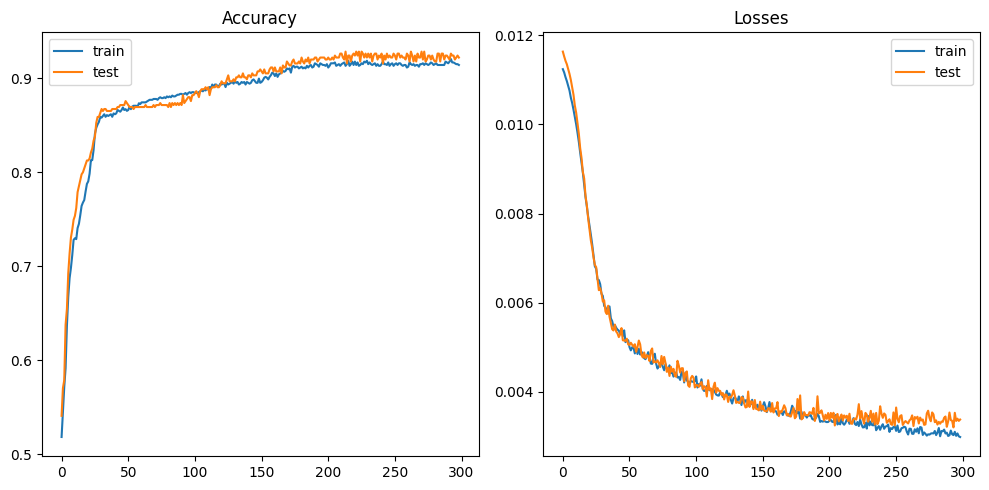

Confusion Matrix : 
                  Predicted Negative  Predicted Positive
Actual Negative                 229                  15
Actual Positive                  22                 209
Accuracy: 0.92
Mis-Classification: 0.08
Sensitivity: 0.9
Specificity: 0.94
Precision: 0.94
f_1 Score: 0.92


In [24]:
nn_model(X_drugel_train, X_drugel_test, y_drugel_train, y_drugel_test, df_drugel)

In [25]:
sklearn_ml(df_domin, target_domin, X_domin_train, y_domin_train, X_domin_test, y_domin_test)

     Classifier  Valid accuracy
0  RandomForest        0.936842
0.9399494310998735


Epoch: 1
Train avg loss: 0.011528340135486469, train acc: 0.4363143631436314
Test avg loss: 0.011858692796606767, test acc: 0.45473684210526316
Epoch: 2
Train avg loss: 0.01138476821465221, train acc: 0.4561878952122855
Test avg loss: 0.011734123355463932, test acc: 0.47789473684210526
Epoch: 3
Train avg loss: 0.011284191380132935, train acc: 0.48509485094850946
Test avg loss: 0.01166086899606805, test acc: 0.49473684210526314
Epoch: 4
Train avg loss: 0.011224203370343272, train acc: 0.5058717253839206
Test avg loss: 0.011592851939954256, test acc: 0.5178947368421053
Epoch: 5
Train avg loss: 0.011141692504434836, train acc: 0.5212285456187895
Test avg loss: 0.011521397891797517, test acc: 0.5326315789473685
Epoch: 6
Train avg loss: 0.011050420240335024, train acc: 0.5672990063233966
Test avg loss: 0.011435400812249434, test acc: 0.5621052631578948
Epoch: 7
Train avg loss: 0.010961015965341983, train acc: 0.5898825654923215
Test avg loss: 0.011361725330352783, test acc: 0.62736842105263

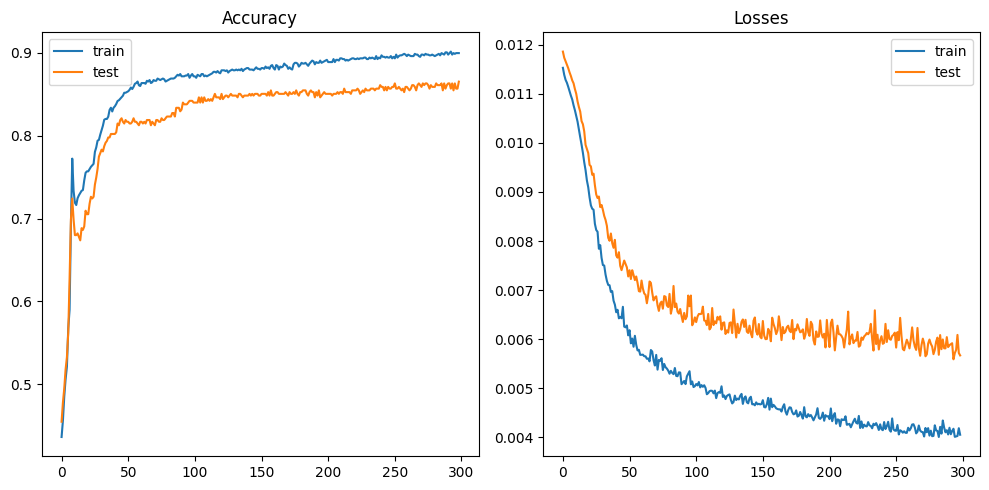

Confusion Matrix : 
                  Predicted Negative  Predicted Positive
Actual Negative                 198                  26
Actual Positive                  38                 213
Accuracy: 0.87
Mis-Classification: 0.13
Sensitivity: 0.85
Specificity: 0.88
Precision: 0.88
f_1 Score: 0.87


In [26]:
nn_model(X_domin_train, X_domin_test, y_domin_train, y_domin_test, df_domin)